# Data Collection and loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
path= Path(r'Sales')

In [4]:
df_list= []
for file in path.glob('*.csv'):
    df= pd.read_csv(file)
    df_list.append(df)

df= pd.concat(df_list,keys = ['April', 'August','December','Feburary','January','July','June','March','May','November','October','Setember'])

In [5]:
df.to_csv('Combined.csv')

# Initial Data Inspection

In [6]:
df.sample(5)

Order ID                   Product Quantity Ordered Price Each  \
December 7278    302610  Apple Airpods Headphones                1        150   
         15052   310041  Apple Airpods Headphones                1        150   
Feburary 9450    159525  Lightning Charging Cable                1      14.95   
January  6685    147590     AA Batteries (4-pack)                1       3.84   
December 24246   318829      USB-C Charging Cable                1      11.95   

                    Order Date                        Purchase Address  
December 7278   12/06/19 09:18   587 Maple St, New York City, NY 10001  
         15052  12/29/19 14:06          351 Maple St, Boston, MA 02215  
Feburary 9450   02/08/19 17:08  877 Forest St, San Francisco, CA 94016  
January  6685   01/21/19 15:52     647 9th St, San Francisco, CA 94016  
December 24246  12/07/19 17:09   702 Hickory St, Los Angeles, CA 90001

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 186850 entries, ('April', 0) to ('Setember', 11685)
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [8]:
df.shape

(186850, 6)

In [9]:
df.describe(include= 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Data Cleaning

In [11]:
df.duplicated().sum()

1162

In [12]:
df.drop_duplicates()

Order ID                     Product Quantity Ordered  \
April    0       176558        USB-C Charging Cable                2   
         1          NaN                         NaN              NaN   
         2       176559  Bose SoundSport Headphones                1   
         3       176560                Google Phone                1   
         4       176560            Wired Headphones                1   
...                 ...                         ...              ...   
Setember 11681   259353      AAA Batteries (4-pack)                3   
         11682   259354                      iPhone                1   
         11683   259355                      iPhone                1   
         11684   259356      34in Ultrawide Monitor                1   
         11685   259357        USB-C Charging Cable                1   

               Price Each      Order Date  \
April    0          11.95  04/19/19 08:46   
         1            NaN             NaN   
         2          99.99  04/07/19 22:30   
         3            600  04/12/19 14:38   
         4          11.99  04/12/19 14:38   
...                   ...             ...   
Setember 11681       2.99  09/17/19 20:56   
         11682        700  09/01/19 16:00   
         11683        700  09/23/19 07:39   
         11684     379.99  09/19/19 17:30   
         11685      11.95  09/30/19 00:18   

                                       Purchase Address  
April    0                 917 1st St, Dallas, TX 75001  
         1                                          NaN  
         2            682 Chestnut St, Boston, MA 02215  
         3         669 Spruce St, Los Angeles, CA 90001  
         4         669 Spruce St, Los Angeles, CA 90001  
...                                                 ...  
Setember 11681   840 Highland St, Los Angeles, CA 90001  
         11682  216 Dogwood St, San Francisco, CA 94016  
         11683     220 12th St, San Francisco, CA 94016  
         11684   511 Forest St, San Francisco, CA 94016  
         11685   250 Meadow St, San Francisco, CA 94016  

[185688 rows x 6 columns]

# Handling Missing Data

In [13]:
df.isnull().sum()/ len(df) *100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [14]:
df=df.dropna()

# Fixing Data Types

In [15]:
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors= 'coerce')

In [16]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Sort Data by order id

In [17]:
df=df.sort_values(by= 'Order ID')

In [18]:
df.describe(include= 'all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,185950.000000,185950.000000,186305,186305
unique,178438,20,NaN,NaN,142396,140788
top,Order ID,USB-C Charging Cable,NaN,NaN,Order Date,Purchase Address
freq,355,21903,NaN,NaN,355,355
mean,NaN,NaN,1.124383,184.399735,NaN,NaN
std,NaN,NaN,0.442793,332.731330,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN
50%,NaN,NaN,1.000000,14.950000,NaN,NaN
75%,NaN,NaN,1.000000,150.000000,NaN,NaN


In [19]:
df.shape

(186305, 6)

In [20]:
df.head(5)

Order ID                   Product  Quantity Ordered  Price Each  \
January 0   141234                    iPhone               1.0      700.00   
        1   141235  Lightning Charging Cable               1.0       14.95   
        2   141236          Wired Headphones               2.0       11.99   
        3   141237          27in FHD Monitor               1.0      149.99   
        4   141238          Wired Headphones               1.0       11.99   

               Order Date                       Purchase Address  
January 0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
        1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
        2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
        3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
        4  01/25/19 11:59          387 10th St, Austin, TX 73301

# Fix the purchase address column

In [21]:
df['Purchase_City']= df['Purchase Address'].astype(str).str.split(',').str.get(1)

In [22]:
df['Postal_codes']= df['Purchase Address'].astype(str).str.slice(-5)

In [23]:
df['Purchase Address']= df['Purchase Address'].astype(str).str.split(',').str.get(0)

In [24]:
df.head(5)

Order ID                   Product  Quantity Ordered  Price Each  \
January 0   141234                    iPhone               1.0      700.00   
        1   141235  Lightning Charging Cable               1.0       14.95   
        2   141236          Wired Headphones               2.0       11.99   
        3   141237          27in FHD Monitor               1.0      149.99   
        4   141238          Wired Headphones               1.0       11.99   

               Order Date Purchase Address   Purchase_City Postal_codes  
January 0  01/22/19 21:25    944 Walnut St          Boston        02215  
        1  01/28/19 14:15     185 Maple St        Portland        97035  
        2  01/17/19 13:33     538 Adams St   San Francisco        94016  
        3  01/05/19 20:33      738 10th St     Los Angeles        90001  
        4  01/25/19 11:59      387 10th St          Austin        73301

# Fix Order date column

In [25]:
df['Order_Time']= df['Order Date'].str.split(' ').str.get(1)

In [26]:
df['Order Date']= df['Order Date'].str.split(' ').str.get(0)

In [27]:
df.head(5)

Order ID                   Product  Quantity Ordered  Price Each  \
January 0   141234                    iPhone               1.0      700.00   
        1   141235  Lightning Charging Cable               1.0       14.95   
        2   141236          Wired Headphones               2.0       11.99   
        3   141237          27in FHD Monitor               1.0      149.99   
        4   141238          Wired Headphones               1.0       11.99   

          Order Date Purchase Address   Purchase_City Postal_codes Order_Time  
January 0   01/22/19    944 Walnut St          Boston        02215      21:25  
        1   01/28/19     185 Maple St        Portland        97035      14:15  
        2   01/17/19     538 Adams St   San Francisco        94016      13:33  
        3   01/05/19      738 10th St     Los Angeles        90001      20:33  
        4   01/25/19      387 10th St          Austin        73301      11:59

# Total Sales Price

In [28]:
df['Total_Sales_price']= df['Quantity Ordered'] * df['Price Each']

# Dropping purchase adress in the 'Purchase Address column cause the remaning values are insgnificant

In [29]:
df= df[df['Purchase Address'] != 'Purchase Address']
df.dropna()

Order ID                     Product  Quantity Ordered  \
January  0       141234                      iPhone               1.0   
         1       141235    Lightning Charging Cable               1.0   
         2       141236            Wired Headphones               2.0   
         3       141237            27in FHD Monitor               1.0   
         4       141238            Wired Headphones               1.0   
...                 ...                         ...               ...   
December 25112   319666    Lightning Charging Cable               1.0   
         25113   319667       AA Batteries (4-pack)               2.0   
         25114   319668             Vareebadd Phone               1.0   
         25115   319669            Wired Headphones               1.0   
         25116   319670  Bose SoundSport Headphones               1.0   

                Price Each Order Date Purchase Address   Purchase_City  \
January  0          700.00   01/22/19    944 Walnut St          Boston   
         1           14.95   01/28/19     185 Maple St        Portland   
         2           11.99   01/17/19     538 Adams St   San Francisco   
         3          149.99   01/05/19      738 10th St     Los Angeles   
         4           11.99   01/25/19      387 10th St          Austin   
...                    ...        ...              ...             ...   
December 25112       14.95   12/11/19    14 Madison St   San Francisco   
         25113        3.84   12/01/19    549 Willow St     Los Angeles   
         25114      400.00   12/09/19    273 Wilson St         Seattle   
         25115       11.99   12/03/19     778 River St          Dallas   
         25116       99.99   12/21/19  747 Chestnut St     Los Angeles   

               Postal_codes Order_Time  Total_Sales_price  
January  0            02215      21:25             700.00  
         1            97035      14:15              14.95  
         2            94016      13:33              23.98  
         3            90001      20:33             149.99  
         4            73301      11:59              11.99  
...                     ...        ...                ...  
December 25112        94016      20:58              14.95  
         25113        90001      12:01               7.68  
         25114        98101      06:43             400.00  
         25115        75001      10:39              11.99  
         25116        90001      21:45              99.99  

[185950 rows x 10 columns]

In [30]:
df1= df

# Univariable analysis

In [31]:
coll= df[['Quantity Ordered','Price Each','Total_Sales_price']]

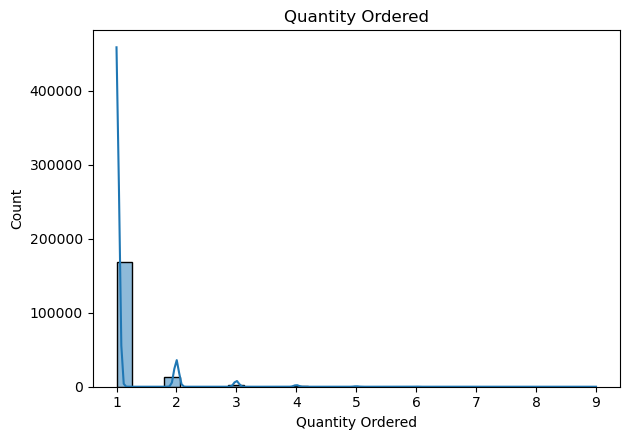

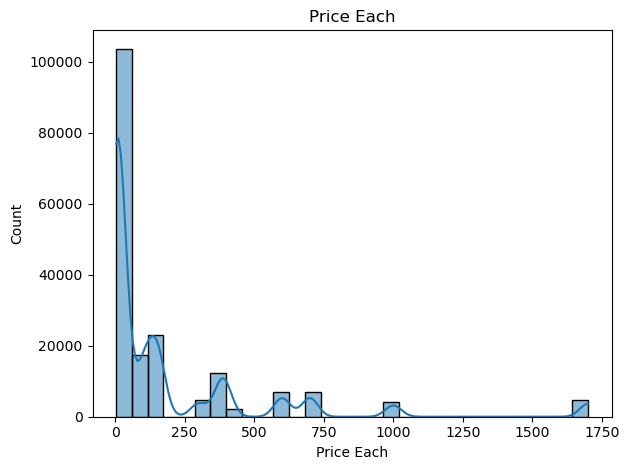

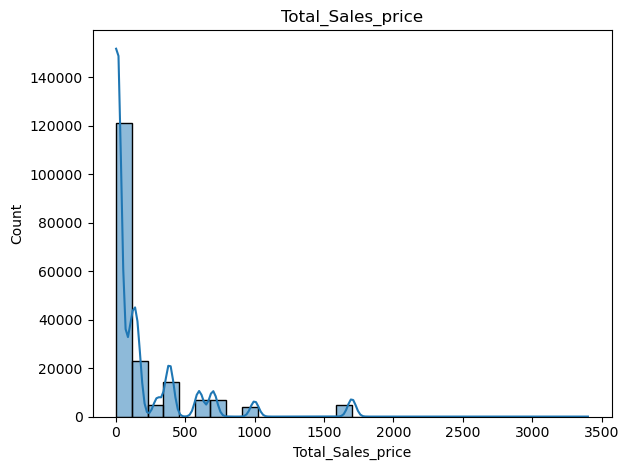

In [32]:

plt.figure(figsize= (6.4,4.5))
for col in coll.columns:
    sns.histplot(df[col], kde= True, bins= 30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

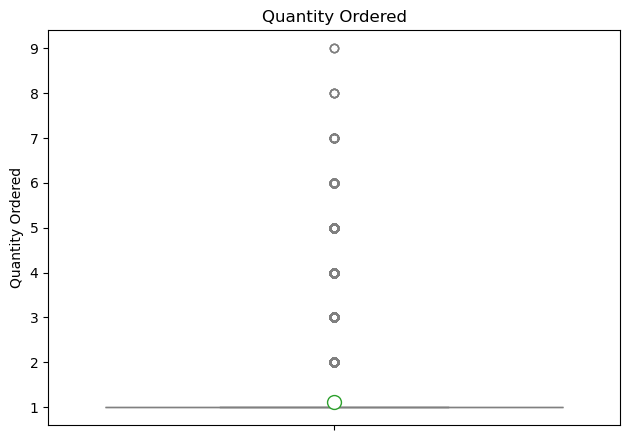

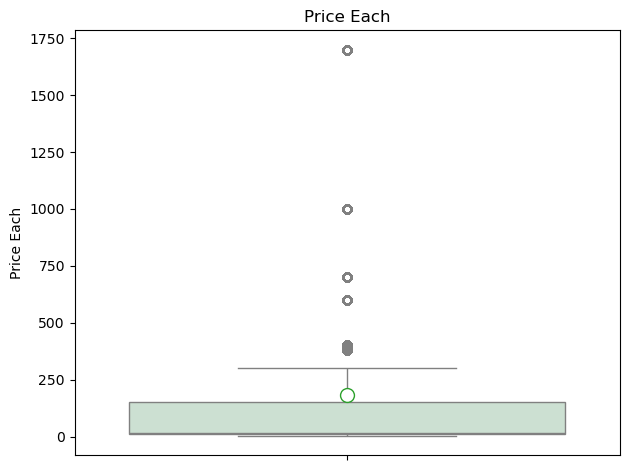

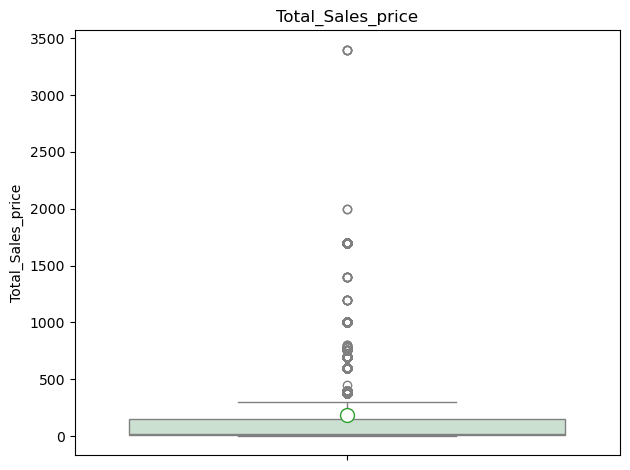

In [33]:
plt.figure(figsize= (6.4,4.5))
for col in coll.columns:
    sns.boxplot(df[col], 
               saturation = 0.3,
               fill= True,
               showmeans= True,
                meanprops= {
                    "marker": "o",
                    "markerfacecolor": "White",
                    "markersize": "10"
                },
               color= '#B4F8C8')
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [34]:
coll= df[['Product','Purchase Address','Purchase_City']]

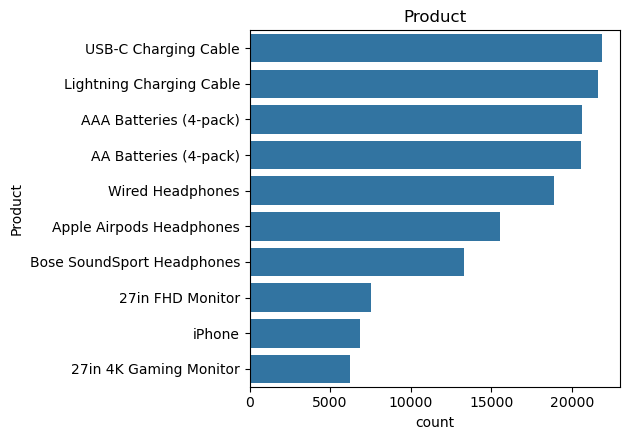

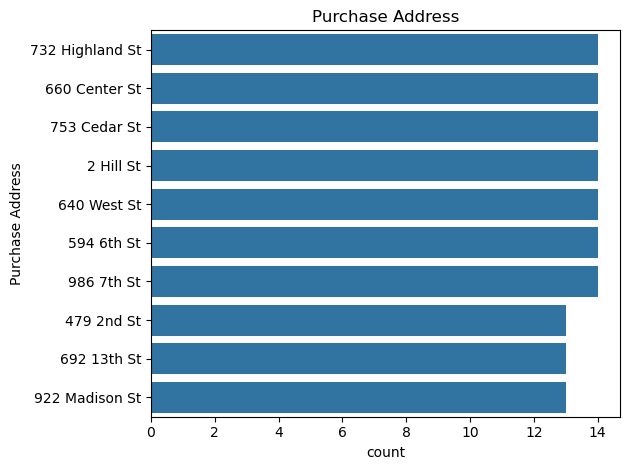

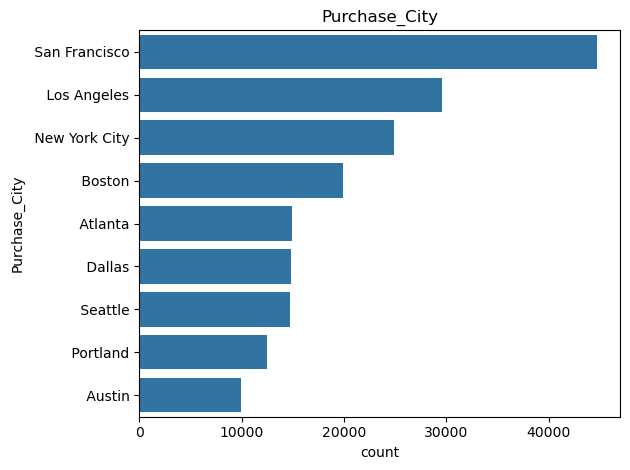

In [35]:
plt.figure(figsize= (6.4,4.5))
for col in coll.columns:
    sns.countplot(y= df[col], order= df[col].value_counts().index[:10])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [36]:
coll.value_counts().reset_index()

,Product,Purchase Address,Purchase_City,count
0,Lightning Charging Cable,426 13th St,New York City,4
1,Wired Headphones,791 Wilson St,San Francisco,4
2,AA Batteries (4-pack),29 2nd St,San Francisco,3
3,AAA Batteries (4-pack),676 Dogwood St,Los Angeles,3
4,AA Batteries (4-pack),284 Walnut St,San Francisco,3
...,...,...,...,...
181449,AAA Batteries (4-pack),880 Cedar St,San Francisco,1
181450,AAA Batteries (4-pack),880 Center St,San Francisco,1
181451,AAA Batteries (4-pack),880 Lake St,Seattle,1
181452,AAA Batteries (4-pack),880 Sunset St,San Francisco,1


# Insights

80 % of people ordered a single product, business should focus on small oerder that is they should focus on sales of single product


most of the product price falls between 10 and 250 dollars, business should focus on high level sales of cheap product
total sales price peaked at level 1-100, this mean that the business should focus on low level transaction and also there sre 
oppourtunities around the 200-300 and 500-600 dollars worth of product

charging cables, batteries and wired headphones are the product that sells the most, The business should focus more on phone accessories with usb c charging 
charging cable generating the highest demand, the moderate sales of headphone especially the wired indicate potential for growth, business should look out for

San francisco leads with the highest sales count, ny and la both follow respectively


business should focus on san fransisco cause they have the higher market, and also la and ny with a predicted steady increase in demand at those region
and also business should adress underperforming cities

# Identifying Relationships

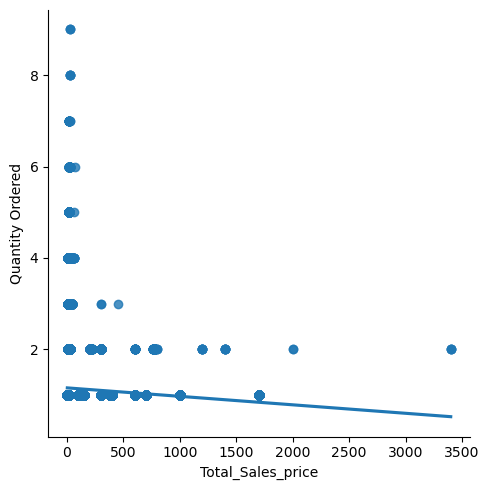

In [37]:
sns.lmplot(data= df, y='Quantity Ordered', x= 'Total_Sales_price')
plt.show()

In [38]:

corr= df[['Quantity Ordered','Price Each','Total_Sales_price']]

In [39]:
corr=corr.dropna()

In [40]:
cor= corr.corr()
cor

,Quantity Ordered,Price Each,Total_Sales_price
Quantity Ordered,1.000000,-0.148272,-0.139417
Price Each,-0.148272,1.000000,0.999203
Total_Sales_price,-0.139417,0.999203,1.000000


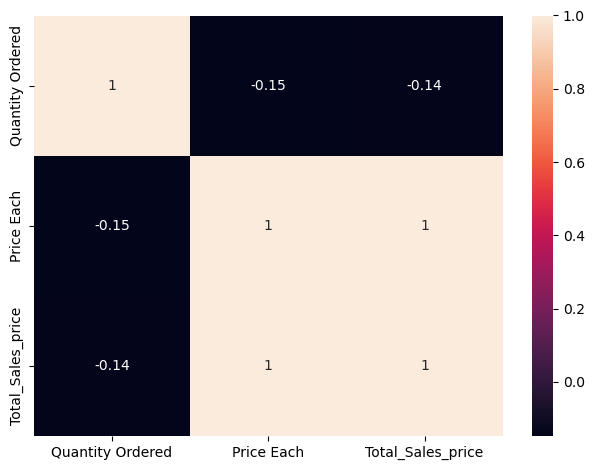

In [41]:

sns.heatmap(cor, annot=True)
plt.tight_layout()
plt.show()


# Insight

Strong positive corellation between postal code and purchase city


Weak negative correlation between total sales and quantity ordered, quantity ordered increases, total sale decreases

strong positive corellation between product and price

weak Negative ciorrelation between price and quantity ordered, that is as price increases quantity ordered decreases

In [42]:
df['month']= df['Order Date'].astype(str).str.split('/').str.get(0)
df['month']= df['month'].astype(int)
df.sample(5)

Order ID                   Product  Quantity Ordered  \
May      15528   208877  Lightning Charging Cable               2.0   
October  19246   277707      USB-C Charging Cable               1.0   
May      9009    202652     AA Batteries (4-pack)               1.0   
December 6094    301472      USB-C Charging Cable               1.0   
         8814    304068              20in Monitor               1.0   

                Price Each Order Date Purchase Address   Purchase_City  \
May      15528       14.95   05/26/19    381 Cherry St          Austin   
October  19246       11.95   10/28/19       980 7th St         Atlanta   
May      9009         3.84   05/14/19    612 Sunset St         Seattle   
December 6094        11.95   12/15/19     758 North St   San Francisco   
         8814       109.99   12/19/19       676 8th St     Los Angeles   

               Postal_codes Order_Time  Total_Sales_price  month  
May      15528        73301      16:57              29.90      5  
October  19246        30301      13:47              11.95     10  
May      9009         98101      16:55               3.84      5  
December 6094         94016      18:13              11.95     12  
         8814         90001      00:22             109.99     12

In [43]:
df['month']= df['month'].apply(lambda x: 'January' if x == 1 else 'Feburary' if x == 2 else 'March' if x== 3 else
                 'April' if x ==4 else 'May' if x == 5 else 'June' if x== 6 else 'July' if x == 7 else
                  'August' if x == 8 else 'September' if x == 9 else 'October' if x == 10 else 'November' if x ==11
                  else 'December'
                 )

In [44]:
a=df.groupby(['month','Product'])['Quantity Ordered'].count().reset_index().sort_values('month')

In [45]:
a.head(5)

,month,Product,Quantity Ordered
0,April,20in Monitor,388
18,April,iPhone,691
17,April,Wired Headphones,1889
16,April,Vareebadd Phone,220
15,April,USB-C Charging Cable,2078


usb c charging cable has the most sale in the month of december , ligthning charging cable in april and august

In [46]:
df.groupby('Product')[['Quantity Ordered','Price Each','Order Date',
            'Purchase Address','Purchase_City','Postal_codes','Order_Time','Total_Sales_price'
            ,'month']].count()

,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_City,Postal_codes,Order_Time,Total_Sales_price,month
Product,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800


# Time series Analysis

In [47]:
df.sample(5)

,,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_City,Postal_codes,Order_Time,Total_Sales_price,month
June,739,210628,USB-C Charging Cable,1.0,11.95,06/25/19,62 Church St,Los Angeles,90001,18:09,11.95,June
July,6298,228932,USB-C Charging Cable,2.0,11.95,07/05/19,121 Chestnut St,San Francisco,94016,11:24,23.90,July
May,530,194594,iPhone,1.0,700.00,05/08/19,689 Meadow St,Dallas,75001,14:34,700.00,May
November,3201,281863,iPhone,1.0,700.00,11/12/19,361 Meadow St,San Francisco,94016,21:00,700.00,November
Setember,124,248271,34in Ultrawide Monitor,1.0,379.99,09/09/19,871 Lincoln St,Boston,02215,15:33,379.99,September


In [48]:
months= ['January', 'Feburary','March','April','May','June','July','August','September','October','November','December']

In [49]:
sales_by_month= df.groupby('month')['Total_Sales_price'].sum()

In [50]:
sales_by_month = sales_by_month.reindex(months).reset_index()

In [51]:
sales_by_month

,month,Total_Sales_price
0,January,1822256.73
1,Feburary,2202022.42
2,March,2807100.38
3,April,3390670.24
4,May,3152606.75
5,June,2577802.26
6,July,2647775.76
7,August,2244467.88
8,September,2097560.13
9,October,3736726.88


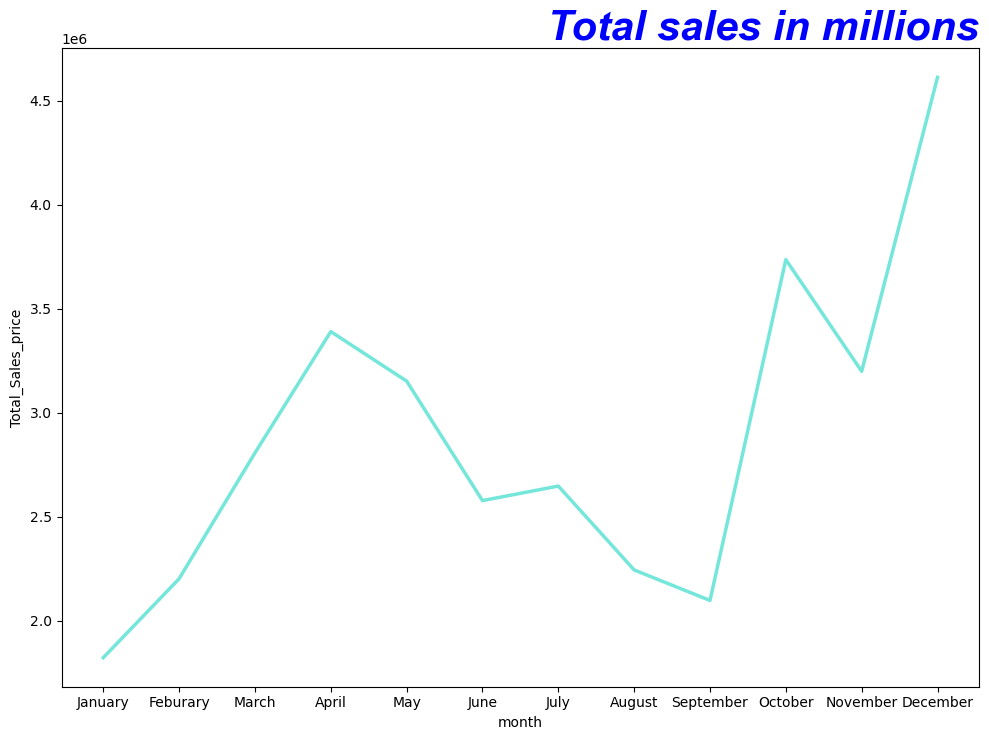

In [52]:
plt.figure(figsize= (10, 7.5))


sns.lineplot(data= sales_by_month,
             x='month', 
            y='Total_Sales_price',
            linewidth= 2.5,
            color= '#75E6DA',
            err_style= 'band',
            markers= ['o', 's','A'])
plt.title('Total sales in millions',
         fontsize= 30, color= 'blue', fontweight= 'bold', loc= 'right',
          fontfamily= 'Arial',
          fontstyle='italic')
plt.tight_layout()
plt.show()

In [53]:
orders= df.groupby('month')['Quantity Ordered'].sum().reindex(months).reset_index()

In [54]:
orders

,month,Quantity Ordered
0,January,10903.0
1,Feburary,13449.0
2,March,17005.0
3,April,20558.0
4,May,18667.0
5,June,15253.0
6,July,16072.0
7,August,13448.0
8,September,13109.0
9,October,22703.0


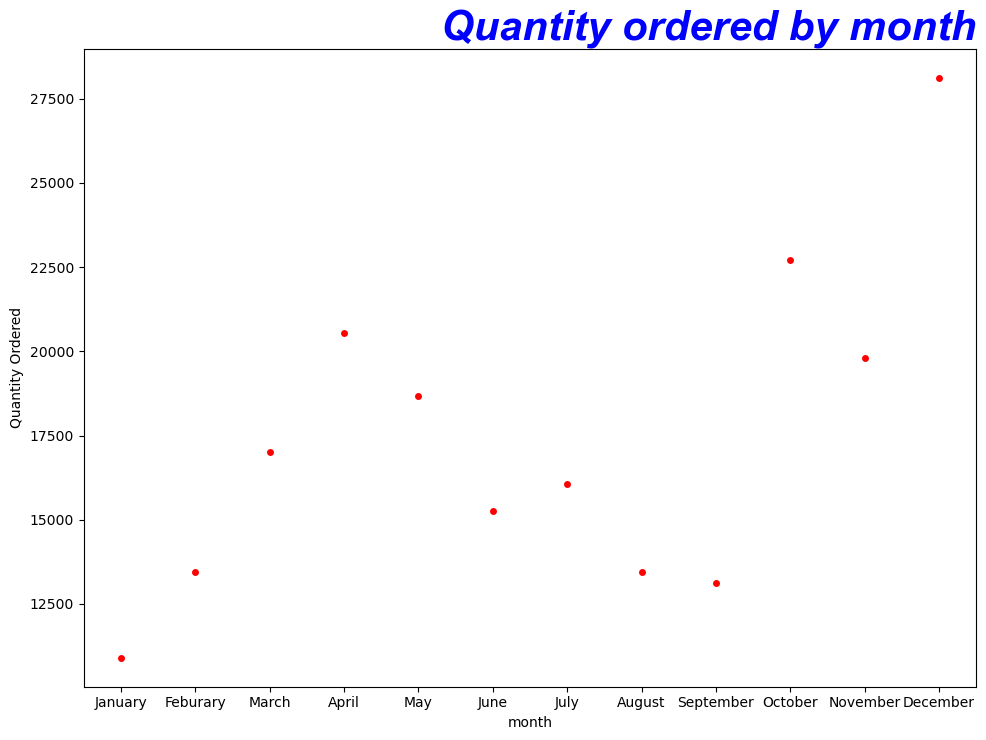

In [55]:
plt.figure(figsize= (10 , 7.5))


sns.stripplot(data= orders,
             x='month', 
            y='Quantity Ordered',
            color= 'red')
plt.title('Quantity ordered by month',
         fontsize= 30, color= 'blue', fontweight= 'bold', loc= 'right',
          fontfamily= 'Arial',
          fontstyle='italic')
plt.tight_layout()
plt.show()

In [56]:
usb_c= df[df['Product']==  'USB-C Charging Cable']
usb_c.groupby('month')['Quantity Ordered'].sum().reset_index()

,month,Quantity Ordered
0,April,2269.0
1,August,1462.0
2,December,3250.0
3,Feburary,1654.0
4,January,1287.0
5,July,1849.0
6,June,1675.0
7,March,1944.0
8,May,2068.0
9,November,2256.0


# What is the best month for sales

In [57]:
sales_by_month

,month,Total_Sales_price
0,January,1822256.73
1,Feburary,2202022.42
2,March,2807100.38
3,April,3390670.24
4,May,3152606.75
5,June,2577802.26
6,July,2647775.76
7,August,2244467.88
8,September,2097560.13
9,October,3736726.88


December is the best month for sale

# What city sold the most product

In [58]:
df.sample(5)

Order ID                   Product  Quantity Ordered  \
May      1471   195480        Macbook Pro Laptop               1.0   
Setember 9504   257274    AAA Batteries (4-pack)               1.0   
April    8594   184766                    iPhone               1.0   
Setember 2582   250626  Apple Airpods Headphones               1.0   
         9076   256860        Macbook Pro Laptop               1.0   

               Price Each Order Date Purchase Address   Purchase_City  \
May      1471     1700.00   05/15/19      546 11th St          Austin   
Setember 9504        2.99   09/02/19    897 Forest St   San Francisco   
April    8594      700.00   04/16/19      349 12th St         Seattle   
Setember 2582      150.00   09/28/19      160 Main St          Boston   
         9076     1700.00   09/18/19   263 Dogwood St   New York City   

              Postal_codes Order_Time  Total_Sales_price      month  
May      1471        73301      20:44            1700.00        May  
Setember 9504        94016      19:46               2.99  September  
April    8594        98101      14:36             700.00      April  
Setember 2582        02215      18:25             150.00  September  
         9076        10001      23:19            1700.00  September

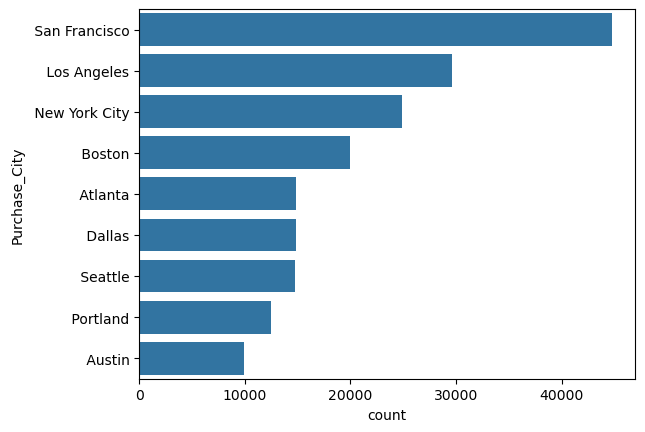

In [59]:
sns.countplot(data= df, y= 'Purchase_City', order= df['Purchase_City'].value_counts().index[:10])
plt.show()

In [60]:
df.groupby('Purchase_City')['Product'].count().reset_index().sort_values('Product', ascending= False)

,Purchase_City,Product
7,San Francisco,44732
4,Los Angeles,29605
5,New York City,24876
2,Boston,19934
0,Atlanta,14881
3,Dallas,14820
8,Seattle,14732
6,Portland,12465
1,Austin,9905


San fransisco sold the most product

# What time should advertisment be displayed to maximize the likehood of a customer buying a product

In [61]:
df.sample(5)

Order ID                     Product  Quantity Ordered  \
Feburary 2392    152786    Lightning Charging Cable               1.0   
December 21252   315966    Lightning Charging Cable               1.0   
October  20074   278500        USB-C Charging Cable               1.0   
         303     259648  Bose SoundSport Headphones               1.0   
November 5469    284026      AAA Batteries (4-pack)               1.0   

                Price Each Order Date Purchase Address   Purchase_City  \
Feburary 2392        14.95   02/21/19   79 Highland St          Austin   
December 21252       14.95   12/21/19       437 4th St   San Francisco   
October  20074       11.95   10/12/19       393 7th St   San Francisco   
         303         99.99   10/26/19    270 Forest St         Atlanta   
November 5469         2.99   11/23/19       17 14th St   New York City   

               Postal_codes Order_Time  Total_Sales_price     month  
Feburary 2392         73301      11:27              14.95  Feburary  
December 21252        94016      12:05              14.95  December  
October  20074        94016      18:43              11.95   October  
         303          30301      06:03              99.99   October  
November 5469         10001      18:20               2.99  November

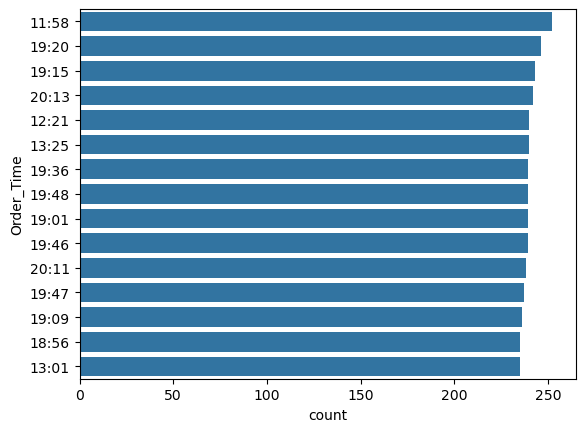

In [62]:
sns.countplot(data= df, y= 'Order_Time', order= df['Order_Time'].value_counts().index[:15])
plt.show()

In [63]:
time=df['Order_Time'].value_counts().reset_index()
time.tail(5)

,Order_Time,count
1435,04:09,8
1436,03:23,7
1437,03:47,7
1438,04:23,6
1439,04:05,5


Advertisment should be displayed within 11:30 to 1:25 and 6:50 to 8: 20

We have the highest number of orders at this period in response to advertisment

# What product sold the most and why

In [64]:
df.sample(5)

,,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_City,Postal_codes,Order_Time,Total_Sales_price,month
April,907,177422,Macbook Pro Laptop,1.0,1700.00,04/05/19,368 Jackson St,San Francisco,94016,19:52,1700.00,April
May,6375,200150,Bose SoundSport Headphones,1.0,99.99,05/28/19,850 Hill St,Seattle,98101,12:35,99.99,May
November,965,279718,AA Batteries (4-pack),1.0,3.84,11/04/19,871 North St,Boston,02215,14:00,3.84,November
April,5082,181412,Vareebadd Phone,1.0,400.00,04/23/19,660 River St,Austin,73301,20:18,400.00,April
March,1440,163375,Lightning Charging Cable,3.0,14.95,03/06/19,79 Lakeview St,San Francisco,94016,22:30,44.85,March


In [67]:
product=df.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values('Quantity Ordered', ascending = False)
product.head(10)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017.0
4,AA Batteries (4-pack),27635.0
15,USB-C Charging Cable,23975.0
12,Lightning Charging Cable,23217.0
17,Wired Headphones,20557.0
6,Apple Airpods Headphones,15661.0
7,Bose SoundSport Headphones,13457.0
2,27in FHD Monitor,7550.0
18,iPhone,6849.0
1,27in 4K Gaming Monitor,6244.0


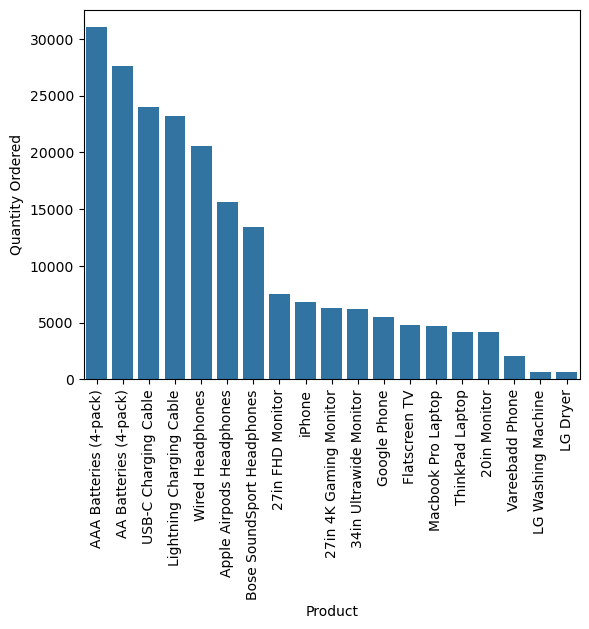

In [72]:
sns.barplot(data= product, x= 'Product', y= 'Quantity Ordered')
plt.xticks(rotation= 90)
plt.show()

AAA Batteries (4-pack) Was the product that sold out the most followed by AA Batteries (4-pack) and USB-C Charging Cable

USb-c Chargin cable was Ordered the most the most, followed by lightening chargeing cable 
it was ordered the most because smartphone dominate eletronic sales, and new iphones switched to the usb-c port, remenber iphones are the highest selling phones in the us
Although AAA Batteries (4-pack)	and AA Batteries (4-pack) have the highest quantity ordered due to the fact that batteries are needed in multiple quantity to work unlike a single usb cable

# What product are most often sold together

In [73]:
df.sample(5)

,,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_City,Postal_codes,Order_Time,Total_Sales_price,month
December,14584,309587,USB-C Charging Cable,1.0,11.95,12/16/19,251 Sunset St,Portland,97035,19:16,11.95,December
August,3413,239950,Bose SoundSport Headphones,1.0,99.99,08/03/19,275 10th St,San Francisco,94016,08:55,99.99,August
Setember,2552,250599,USB-C Charging Cable,1.0,11.95,09/02/19,116 1st St,Los Angeles,90001,17:24,11.95,September
April,14106,190007,iPhone,1.0,700.00,04/20/19,797 Center St,Boston,02215,06:40,700.00,April
October,2498,261740,AA Batteries (4-pack),2.0,3.84,10/25/19,105 11th St,New York City,10001,15:12,7.68,October


In [124]:
a=df.groupby('Order ID')['Product'].sum().reset_index()
a.sample(5)

,Order ID,Product
37257,178491,USB-C Charging Cable
91818,233052,AAA Batteries (4-pack)
126118,267352,Apple Airpods Headphones
8690,149924,27in 4K Gaming Monitor
169778,311012,AA Batteries (4-pack)


In [125]:
a= a.Product.value_counts().reset_index()
a.sample(5)

,Product,count
364,LG Washing MachineMacbook Pro Laptop,1
52,Vareebadd PhoneBose SoundSport Headphones,41
161,ThinkPad LaptopUSB-C Charging Cable,10
21,Lightning Charging CableiPhone,275
231,USB-C Charging CableGoogle PhoneWired Headphones,5


In [130]:
a= a.sort_values(by= 'count', ascending = False)
a.head(20)

,Product,count
0,Lightning Charging Cable,19831
1,AAA Batteries (4-pack),19826
2,AA Batteries (4-pack),19809
3,USB-C Charging Cable,19792
4,Wired Headphones,17208
5,Apple Airpods Headphones,14575
6,Bose SoundSport Headphones,12505
7,27in FHD Monitor,7213
8,27in 4K Gaming Monitor,5979
9,34in Ultrawide Monitor,5935


* iPhone, Lightning Charging Cable are the product sold together the most

In [131]:
df1
corr = df1

for col in corr.columns:
    if corr[col].dtype == "object":
        corr[col]= corr[col].astype('category')
        corr[col]= corr[col].cat.codes

In [132]:
corr= corr.corr()

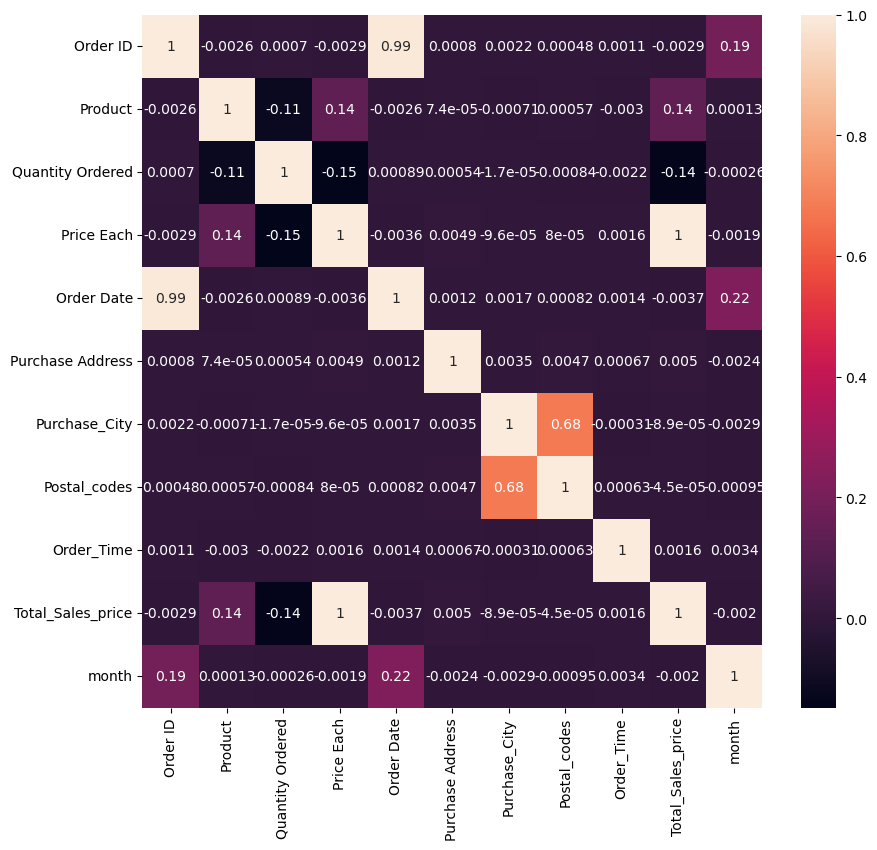

In [133]:
plt.figure(figsize= (10,9))
sns.heatmap(corr, annot= True)
plt.show()

In [134]:
corr= corr.unstack()

In [135]:
corr.reset_index()

,level_0,level_1,0
0,Order ID,Order ID,1.000000
1,Order ID,Product,-0.002569
2,Order ID,Quantity Ordered,0.000702
3,Order ID,Price Each,-0.002857
4,Order ID,Order Date,0.989738
...,...,...,...
116,month,Purchase_City,-0.002929
117,month,Postal_codes,-0.000949
118,month,Order_Time,0.003404
119,month,Total_Sales_price,-0.002029


In [136]:
corr=corr.sort_values(ascending= False)

In [137]:
corr.head(25)

Order ID           Order ID             1.000000
Product            Product              1.000000
Total_Sales_price  Total_Sales_price    1.000000
Order_Time         Order_Time           1.000000
Postal_codes       Postal_codes         1.000000
Purchase_City      Purchase_City        1.000000
Order Date         Order Date           1.000000
Price Each         Price Each           1.000000
Quantity Ordered   Quantity Ordered     1.000000
Purchase Address   Purchase Address     1.000000
month              month                1.000000
Price Each         Total_Sales_price    0.999203
Total_Sales_price  Price Each           0.999203
Order ID           Order Date           0.989738
Order Date         Order ID             0.989738
Postal_codes       Purchase_City        0.680218
Purchase_City      Postal_codes         0.680218
month              Order Date           0.222892
Order Date         month                0.222892
month              Order ID             0.190158
Order ID           m

In [138]:
df.describe(include='all')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase_City,Postal_codes,Order_Time,Total_Sales_price,month
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,89183.569379,9.134794,1.124383,184.399735,199.223560,23415.637688,4.532417,4.915257,894.279640,185.490917,5.468599
std,51512.737110,5.383887,0.442793,332.731330,107.172296,13529.738708,2.412355,2.708327,325.599969,332.919771,3.532076
min,0.000000,0.000000,1.000000,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,2.990000,0.000000
25%,44597.250000,5.000000,1.000000,11.950000,106.000000,11692.000000,3.000000,2.000000,677.000000,11.950000,2.000000
50%,89133.500000,7.000000,1.000000,14.950000,198.000000,23388.000000,5.000000,6.000000,911.000000,14.950000,6.000000
75%,133801.750000,15.000000,1.000000,150.000000,299.000000,35157.000000,7.000000,7.000000,1161.000000,150.000000,9.000000
max,178436.000000,18.000000,9.000000,1700.000000,365.000000,46836.000000,8.000000,9.000000,1439.000000,3400.000000,11.000000


# INsights

* 80 % of people ordered a single product, business should focus on small orders, that is they should focus on sales of single product

* Most of the product price falls between 10 and 250 dollars, business should focus on high level sales of cheap product


* Total sales price peaked at 1-100$, this mean that the business should focus on low level transaction and also there sre oppourtunities around the 200-300 and 500-600 dollars worth of product

* The minimum quantity ordered is 1 snd the msximum is 9 with an average of 1.124, that is for every order placed, 1.1 quantity is ordered, business should focus on small scale orders

* charging cables, batteries and wired headphones are the product that sells the most, The business should focus more on phone accessories with usb c charging charging cable generating the highest demand, the moderate sales of headphone especially the wired indicate potential for growth, business should look out for

* San francisco leads with the highest sales count, ny and la both follow respectively. Business should focus on san fransisco cause they have the higher market, and also la and ny with a predicted steady increase in demand at those region and also business should adress underperforming cities

* Strong positive corellation between postal code and purchase city, This implies that the location strongly influence where purchase are made, indicating regional buying pattern

* Weak negative correlation between total sales and quantity ordered,As quantity ordered increases, total sale decrease. This could indicate that lower priced items being ordered in large quantities

* strong positive corellation between product and price, this indicated that product has a strong association with their price

* weak Negative ciorrelation between price and quantity ordered, that is as price increases quantity ordered decreases

* December is the best month for sale with over 2980 products ordered

* Advertisment should be displayed within 11:30 am to 1:25pm  and 6:50pm to 8: 20pm

* We have the highest number of orders at this period in response to advertisment

* USb-c Chargin cable was Ordered the most the most, followed by lightening chargeing cable 
it was ordered the most because smartphone dominate eletronic sales, and new iphones switched to the usb-c port, remenber iphones are the highest selling phones in the us

* And also it sold was ordered the most in december cause it collides with the festive period when gifting drives significant eletronical purchase, many eletronical gift includes a smartphone which requires a usb-c charger

* to work unlike a single usb cable

* AAA Batteries (4-pack) Was the product that sold out the most followed by AA Batteries (4-pack) and USB-C Charging Cable

* iPhone, Lightning Charging Cable are the product sold together the most